In [5]:
# Importar as bibliotecas 
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly

In [8]:
# Carregar o dataframe 

# Dados de exemplo - 10 dias de preço da cotação de compra do dolar (23.06.25 à 03.07.25)
data = {
    'ds': pd.date_range(start='2025-06-23', periods=10, freq='D'),  # 10 dias consecutivos
    'y': [5.4951, 5.5207, 5.4932, 5.5421, 5.5139, 5.4753, 5.4565, 5.4505, 5.4506, 5.4202]  # valores retirados do site 
}

print(f"\n\n Dados: \n\n\t{data} \n\n")

df = pd.DataFrame(data)


print(f"\nDataset \n\n")
df.info()



 Dados: 

	{'ds': DatetimeIndex(['2025-06-23', '2025-06-24', '2025-06-25', '2025-06-26',
               '2025-06-27', '2025-06-28', '2025-06-29', '2025-06-30',
               '2025-07-01', '2025-07-02'],
              dtype='datetime64[ns]', freq='D'), 'y': [5.4951, 5.5207, 5.4932, 5.5421, 5.5139, 5.4753, 5.4565, 5.4505, 5.4506, 5.4202]} 



Dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10 non-null     datetime64[ns]
 1   y       10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


In [10]:
# Criar uma instância do modelo
model = Prophet()

In [11]:
model.fit(df)

19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Criar datas futuras (5 dias a mais)
future = model.make_future_dataframe(periods=5)

future.info()

future.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      15 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 248.0 bytes


,ds
10,2025-07-03
11,2025-07-04
12,2025-07-05
13,2025-07-06
14,2025-07-07


In [13]:
# Gerar previsões
forecast = model.predict(future)

forecast.info ()

forecast.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          15 non-null     datetime64[ns]
 1   trend                       15 non-null     float64       
 2   yhat_lower                  15 non-null     float64       
 3   yhat_upper                  15 non-null     float64       
 4   trend_lower                 15 non-null     float64       
 5   trend_upper                 15 non-null     float64       
 6   additive_terms              15 non-null     float64       
 7   additive_terms_lower        15 non-null     float64       
 8   additive_terms_upper        15 non-null     float64       
 9   multiplicative_terms        15 non-null     float64       
 10  multiplicative_terms_lower  15 non-null     float64       
 11  multiplicative_terms_upper  15 non-null     float64       
 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-06-23,5.495652,5.490348,5.501002,5.495652,5.495652,0.0,0.0,0.0,0.0,0.0,0.0,5.495652
1,2025-06-24,5.519050,5.514131,5.524152,5.519050,5.519050,0.0,0.0,0.0,0.0,0.0,0.0,5.519050
2,2025-06-25,5.495403,5.490201,5.500790,5.495403,5.495403,0.0,0.0,0.0,0.0,0.0,0.0,5.495403
3,2025-06-26,5.541001,5.535707,5.546357,5.541001,5.541001,0.0,0.0,0.0,0.0,0.0,0.0,5.541001
4,2025-06-27,5.512801,5.507510,5.517554,5.512801,5.512801,0.0,0.0,0.0,0.0,0.0,0.0,5.512801


In [14]:
print("=== Previsao ===")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

=== Previsao ===
           ds      yhat  yhat_lower  yhat_upper
0  2025-06-23  5.495652    5.490348    5.501002
1  2025-06-24  5.519050    5.514131    5.524152
2  2025-06-25  5.495403    5.490201    5.500790
3  2025-06-26  5.541001    5.535707    5.546357
4  2025-06-27  5.512801    5.507510    5.517554
5  2025-06-28  5.476404    5.471279    5.481621
6  2025-06-29  5.457604    5.452127    5.462572
7  2025-06-30  5.454393    5.449224    5.459621
8  2025-07-01  5.440070    5.434683    5.445174
9  2025-07-02  5.425746    5.420443    5.430881
10 2025-07-03  5.411423    5.387477    5.435131
11 2025-07-04  5.397099    5.325538    5.474855
12 2025-07-05  5.382776    5.239376    5.535079
13 2025-07-06  5.368452    5.139640    5.613337
14 2025-07-07  5.354129    5.019933    5.700253


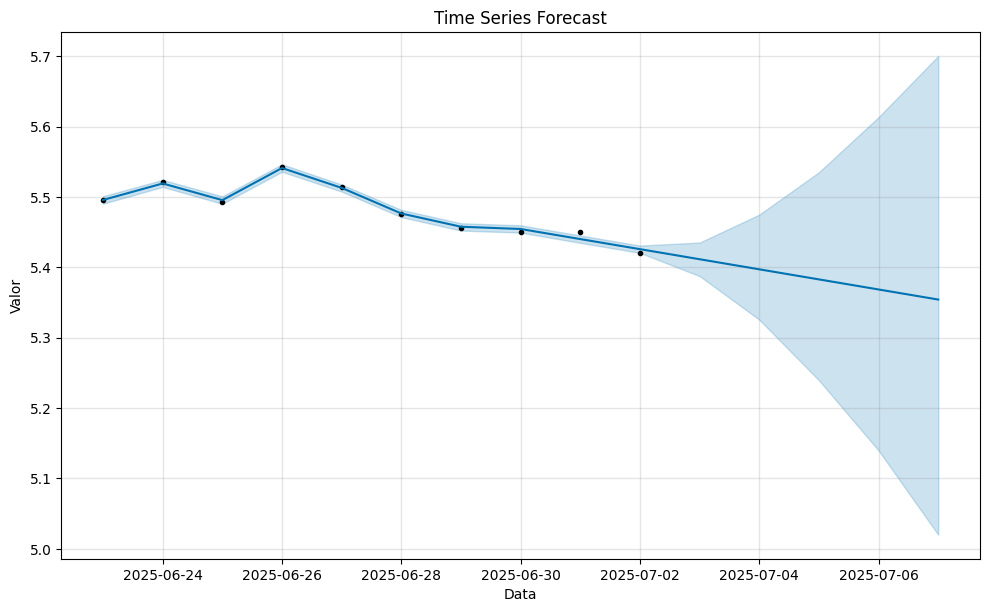

In [15]:
from prophet.plot import plot
import matplotlib.pyplot as plt  # Required for displaying the plot

# Generate the plot
fig = plot(model, forecast)
plt.title("Time Series Forecast")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.show()

C:\Users\nathalia.resende\AppData\Local\Temp\ipykernel_9344\3524413069.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

19:31:40 - cmdstanpy - INFO - Chain [1] start processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing


=== Previsão ===
           ds      yhat  yhat_lower  yhat_upper
0  2024-01-31  4.874832    4.815168    4.935225
1  2024-02-29  4.926628    4.871986    4.984111
2  2024-03-31  4.982142    4.922615    5.040981
3  2024-04-30  5.036529    4.979773    5.094984
4  2024-05-31  5.128392    5.072361    5.182934
5  2024-06-30  5.217292    5.157112    5.276495
6  2024-07-31  5.309158    5.248574    5.373506
7  2024-08-31  5.401023    5.347886    5.459377
8  2024-09-30  5.489926    5.435915    5.549152
9  2024-10-31  5.581791    5.525428    5.633527
10 2024-11-30  5.670693    5.613113    5.727924
11 2024-12-31  5.762559    5.704214    5.823051
12 2025-01-01  5.765522    5.703562    5.823327
13 2025-01-02  5.768486    5.712610    5.827190
14 2025-01-03  5.771449    5.712308    5.827894
15 2025-01-04  5.774412    5.720277    5.834503
16 2025-01-05  5.777376    5.722345    5.835268


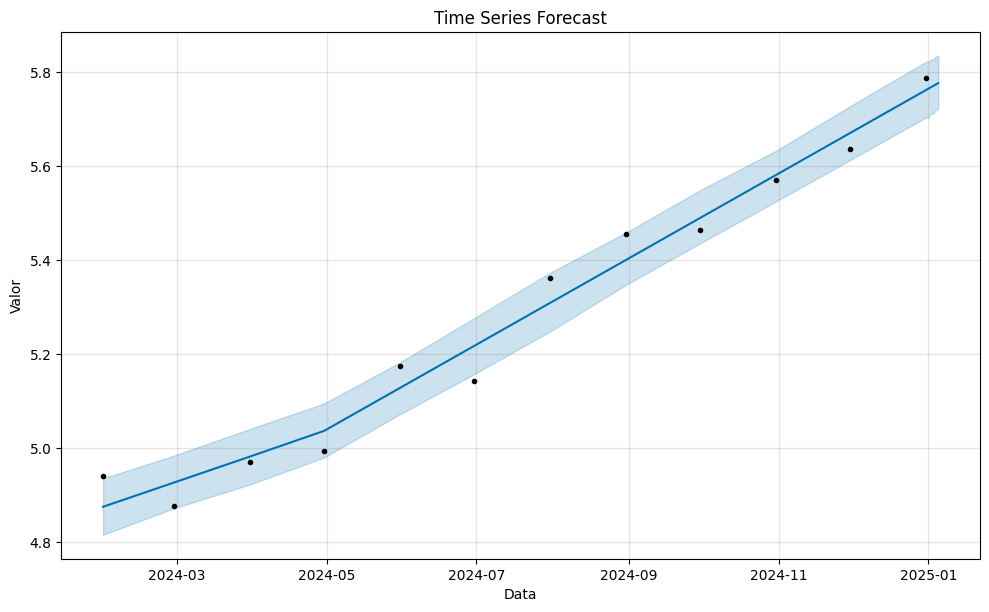

In [24]:
# Agora tentar a previsão mensal a partir dos 12 meses de 2024

data2 = {
    'ds': pd.date_range(start='2024-01-01', periods=12, freq='M'),  # 10 meses
    'y': [4.9397, 4.8765, 4.9710, 4.9937, 5.1746, 5.1423, 5.3630, 5.4563, 5.4651, 5.5717,5.6378, 5.7885]  # valores de exemplo
}
df2 = pd.DataFrame(data2)

# Instanciar o modelo Prophet
model2 = Prophet()

# Treinar (fit) o modelo
model2.fit(df2)

# Criar dataframe futuro (n dias a frente)
future2 = model2.make_future_dataframe(periods=5)  # 5 meses a mais
forecast2 = model2.predict(future2)

print("=== Previsão ===")
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plotar no gráfico de dispersão 
from prophet.plot import plot_plotly
fig2 = plot(model2, forecast2)
plt.title("Time Series Forecast")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.show()